In [4]:
# IQFT 逆量子傅立葉變換
from qiskit import QuantumRegister,QuantumCircuit
from math import pi
def iqft(n):
    br = QuantumRegister(n,'b')
    qc = QuantumCircuit(br)
    # sbit: for swap qubit
    for sbit in range(n//2):
        qc.swap(sbit,n-sbit-1)
    for hbit in range(0,n,1):
        # cbit: for count qubit
        for cbit in range(hbit-1,-1,-1):
            qc.cp(-pi/2**(hbit-cbit),cbit,hbit)
        qc.h(hbit)
    return qc

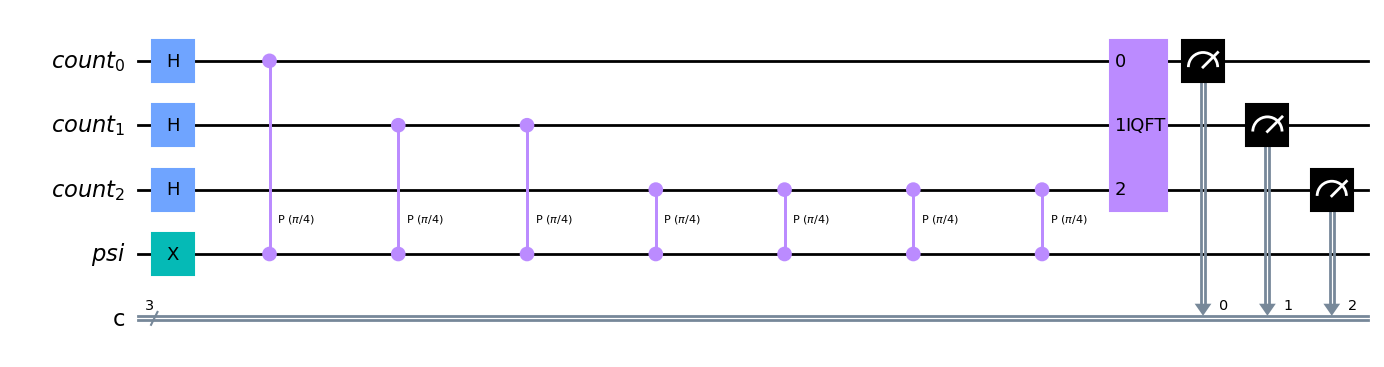

Total counts for qubit states are: {'001': 1000}
The estimated phase is: 0.125


In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, execute, QuantumRegister
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
# the number of count qubits
count_no = 3
countreg = QuantumRegister(count_no,'count')
psireg = QuantumRegister(1,'psi')
creg = ClassicalRegister(count_no,'c')
qc = QuantumCircuit(countreg,psireg,creg)
for countbit in range(count_no):
    qc.h(countbit)
qc.x(psireg)
repeat = 1
for countbit in range(count_no):
    for r in range(repeat):
        # for CT gate
        qc.cp(pi/4,countbit,psireg)
    repeat *= 2
qc.append(iqft(count_no).to_gate(label='IQFT'),range(count_no))
qc.measure(range(count_no),range(count_no))
display(qc.draw())
sim = AerSimulator()
job = execute(qc,backend=sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)
plot_histogram(counts)
# to obtain the key with the max value
max_value_key = max(counts,key=counts.get)
phase = int(max_value_key,base=2)/2**count_no
print("The estimated phase is:",phase)